<a href="https://colab.research.google.com/github/kaushal3312/Linear-Regression-using-Tensorflow-and-Scikit-Learn-/blob/main/LienarRegression_TechProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf



In [46]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kaushal3312/Linear-Regression-using-Tensorflow-and-Scikit-Learn-/main/car.csv'


raw_dataset = pd.read_csv(url)
dataset = raw_dataset.drop(columns=['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine Cylinders', 'Transmission Type','Driven_Wheels','Number of Doors','Market Category','Vehicle Size','Vehicle Style','highway MPG','Popularity','city mpg'])
dataset.head()



,Engine HP,MSRP
0,335.0,46135
1,300.0,40650
2,300.0,36350
3,230.0,29450
4,230.0,34500


In [60]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2)

NameError: ignored

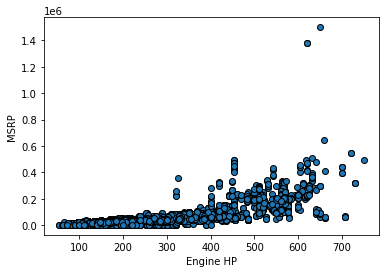

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# With .pop() command, the associated columns are extracted.
x = trainDataset['Engine HP']
y = trainDataset['MSRP']
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('Engine HP')
ax.set_ylabel('MSRP')
plt.show()

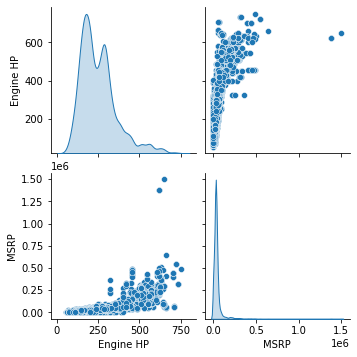

In [49]:
import seaborn as sns
sns.pairplot(trainDataset[["Engine HP", "MSRP"]], 
    diag_kind="kde")

In [59]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
  
normed_train_data = norm(trainDataset)
normed_test_data = norm(testDataset)

normed_train_data.head()

,Engine HP
10736,0.231031
3828,-0.412812
4554,1.242785
2506,2.162561
6745,0.221833


In [57]:
normed_test_data.head()

,Engine HP
0,0.782897
13,-0.182868
21,-0.716339
25,-0.716339
26,-0.716339


In [54]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[len(trainDataset.keys())]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [55]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [56]:
example_batch = normed_test_data[5:6]
example_batch

example_result = model.predict(example_batch)
print(example_result)

[[0.00444028]]


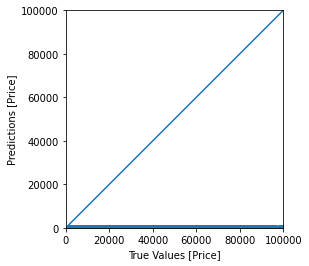

In [58]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)